# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | sao miguel
Processing Record 7 of Set 1 | havre-saint-pierre
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | lebu
City not found. Skipping...
Processing Record 12 of Set 1 | beira
Processing Record 13 of Set 1 | vrangel
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | grand gaube
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | luena
Processing Record 18 of Set 1 | huacho
Processing Record 19 of Set 1 | kurchum
Processing Record 20 of Set 1 | mahroni
Processing Record 21 of Set 1 | sibolga
Processing Record 22 of Set 1 | beloha
Processing Record 23 of Set 1 | vai

Processing Record 35 of Set 4 | beverungen
Processing Record 36 of Set 4 | luanda
Processing Record 37 of Set 4 | awbari
Processing Record 38 of Set 4 | bogorodskoye
Processing Record 39 of Set 4 | navalmoral de la mata
Processing Record 40 of Set 4 | benjamin hill
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | glace bay
Processing Record 43 of Set 4 | bowen
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | fort-shevchenko
Processing Record 46 of Set 4 | aitape
Processing Record 47 of Set 4 | anchorage
Processing Record 48 of Set 4 | santo angelo
Processing Record 49 of Set 4 | san miguelito
Processing Record 1 of Set 5 | beipiao
City not found. Skipping...
Processing Record 2 of Set 5 | ust-kulom
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | atasu
Processing Record 5 of Set 5 | trelew
Processing Record 6 of Set 5 | bira
Processing Record 7 of Set 5 | husavik
City not found. Skipping...
Processing Record 8 of Set 5 

Processing Record 19 of Set 8 | campo verde
Processing Record 20 of Set 8 | tahe
City not found. Skipping...
Processing Record 21 of Set 8 | mehran
Processing Record 22 of Set 8 | lima
Processing Record 23 of Set 8 | blagoveshchenka
Processing Record 24 of Set 8 | takoradi
Processing Record 25 of Set 8 | marrakesh
City not found. Skipping...
Processing Record 26 of Set 8 | simbahan
Processing Record 27 of Set 8 | dudinka
Processing Record 28 of Set 8 | morgan city
City not found. Skipping...
Processing Record 29 of Set 8 | kargasok
Processing Record 30 of Set 8 | byron bay
Processing Record 31 of Set 8 | arlit
Processing Record 32 of Set 8 | asyut
Processing Record 33 of Set 8 | wilkie
Processing Record 34 of Set 8 | imeni babushkina
Processing Record 35 of Set 8 | tessalit
Processing Record 36 of Set 8 | misratah
Processing Record 37 of Set 8 | ketchikan
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | sitka
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [116]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [117]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san patricio,20,ML,1546898105,30,13.30,-4.90,70.12,9.64
1,atuona,76,PF,1546898126,100,-9.80,-139.03,81.37,16.69
2,isangel,24,VU,1546898121,100,-19.55,169.27,77.41,18.03
3,clyde river,0,NZ,1546898144,65,-45.19,169.32,56.44,2.37
4,port alfred,90,FR,1546896600,80,46.16,5.57,39.20,3.36


In [118]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [119]:
weather_dataframe.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [120]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san patricio,20,ML,1546898105,30,13.30,-4.90,70.12,9.64
1,atuona,76,PF,1546898126,100,-9.80,-139.03,81.37,16.69
2,isangel,24,VU,1546898121,100,-19.55,169.27,77.41,18.03
3,clyde river,0,NZ,1546898144,65,-45.19,169.32,56.44,2.37
4,port alfred,90,FR,1546896600,80,46.16,5.57,39.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

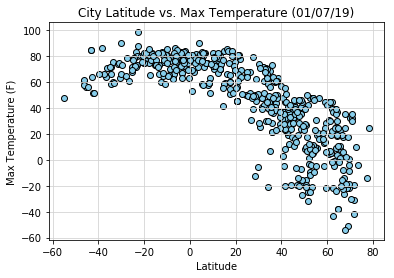

In [121]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Humidity Plot

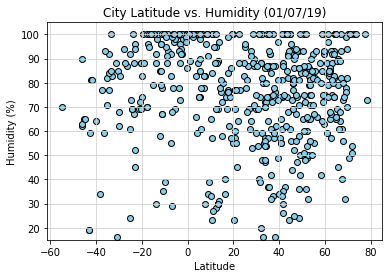

In [122]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Cloudiness Plot

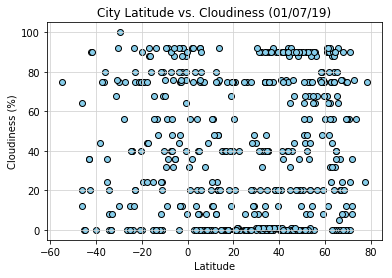

In [123]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#### Latitude vs. Wind Speed Plot

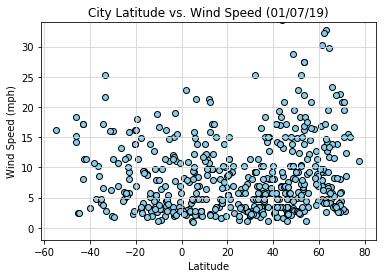

In [124]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")